In [1]:
#%reset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from num2words import num2words
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
oversample = RandomOverSampler(sampling_strategy = 0.5,random_state=10) #need for neural network and random forest


In [2]:
data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data.csv')
data_by_HSA['health_service_area_number']
data_by_HSA['health_service_area']
data_by_HSA['HSA_ID'] = data_by_HSA['health_service_area_number'].astype(str) + '' + data_by_HSA['health_service_area'].apply(lambda x: x.split()[0])
data_by_HSA['beds_over_15_100k'] = (data_by_HSA['beds_weekly'] > 15)*1

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_28741/1751937069.py:1: DtypeWarning: Columns (50,51) have mixed types. Specify dtype option on import or set low_memory=False.
  data_by_HSA = pd.read_csv('/Users/rem76/Documents/COVID_projections/hsa_time_data.csv')


In [4]:
data_by_HSA.columns

Index(['Unnamed: 0', 'date', 'health_service_area_number',
       'health_service_area', 'health_service_area_population', 'cases_avg',
       'deaths_avg', 'cases_avg_per_100k', 'deaths_avg_per_100k',
       'POPESTIMATE2019', 'ymd', 'year', 'week', 'year_wk',
       'admits_confirmed_avg', 'perc_covid', 'admits_confirmed_100K',
       'icu_confirmed_avg', 'icu_100K', 'beds_100k', 'cdc_flag_1',
       'cdc_flag_2', 'cdc_flag', 'deaths_21_lag_100k', 'icu_21_lag_100K',
       'cases_lag_21_100K', 'admits_7_lag', 'admits_7d_ago', 'admits_21d_ago',
       'admits_28d_ago', 'dotw', 'chk', 'county_rank',
       'deaths_21_lag_100k_14d', 'deaths_weekly', 'admits_weekly',
       'cases_weekly', 'icu_weekly', 'beds_weekly', 'perc_covid_100', 'cfr',
       'half_zeke_time_3', 'chk2', 'zeke_time_3', 'two_zeke_time_3',
       'icu_2_time_3', 'perc_covid_10_time_3', 'change_admits', 'change_perc',
       'change_cases', 'zeke_time_3_14d', 'two_zeke_time_3_14d', 'state',
       'weight', 'weight_al

/var/folders/d4/chxwf4hs5kq7ttsp56s64z65mjk3qj/T/ipykernel_28741/1669004360.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(labels =range(len(data_by_HSA['date'].unique())), rotation = 0, fontsize=10)


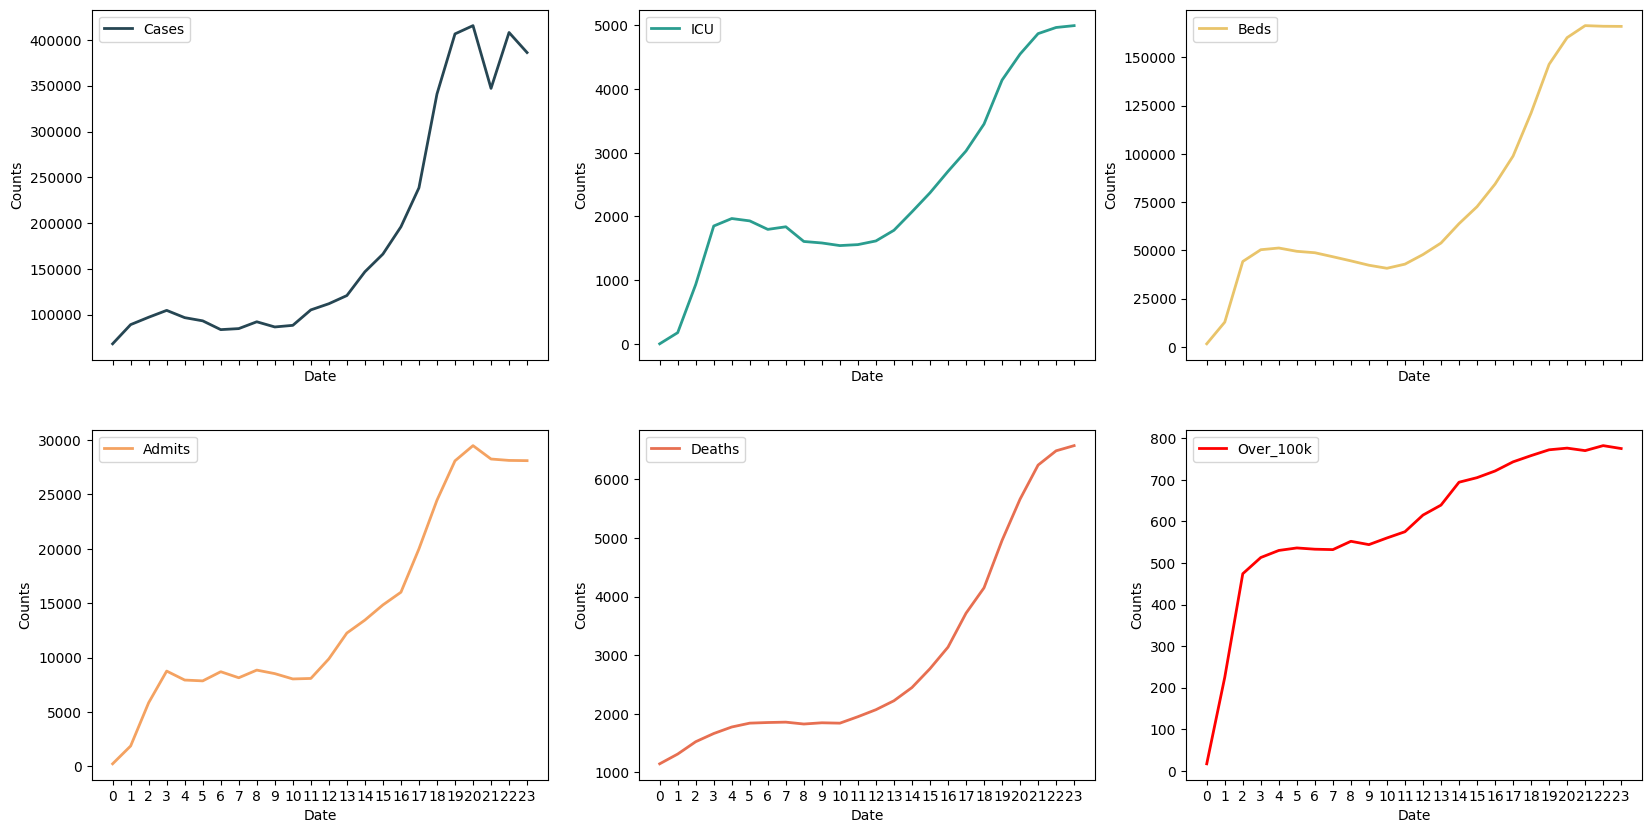

In [34]:
fig, axs = plt.subplots(2,3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('date')
i = 0
axs = axs.ravel()

for column in columns_to_plot:
        if column == 'beds_over_15k':
                axs[i].plot(weekly_groups['date'].first(), weekly_groups.isnull().sum(axis=1), label = labels[i], color = colours[i], linewidth = 2)
        else:
                axs[i].plot(weekly_groups['date'].first(), weekly_groups[column].sum(), label = labels[i], color = colours[i], linewidth = 2)
                axs[i].legend()
                axs[i].set_xlabel('Date')
                axs[i].set_ylabel('Counts')
                axs[i].set_xticklabels(labels =range(len(data_by_HSA['date'].unique())), rotation = 0, fontsize=10)

                        

        i += 1

plt.show()

In [35]:
weekly_groups.isnull().sum(axis=1)

AttributeError: 'DataFrameGroupBy' object has no attribute 'isnull'

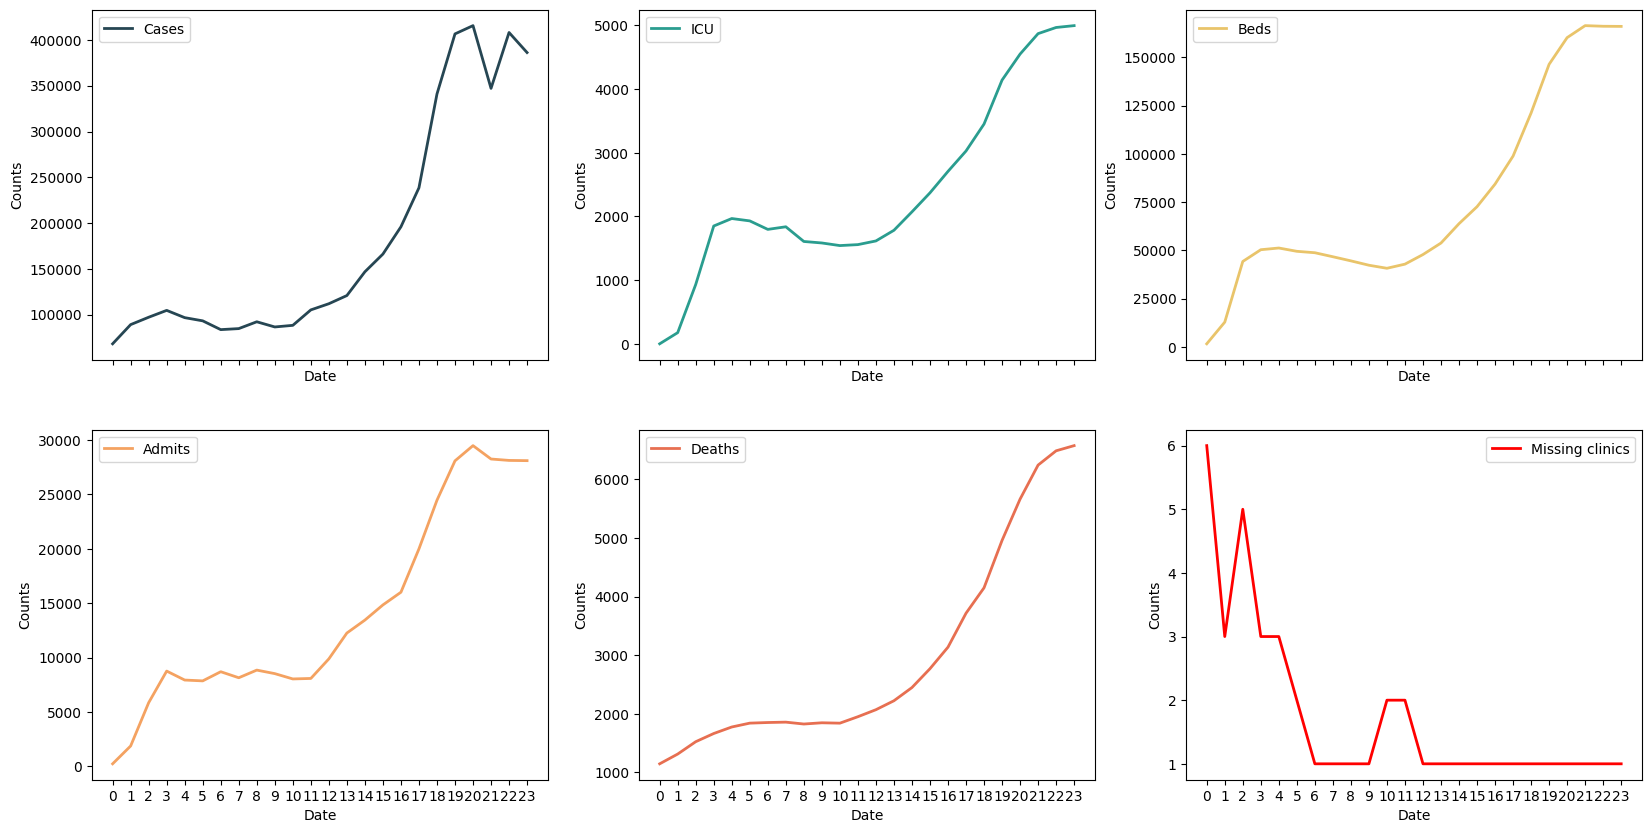

In [41]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), facecolor='w', edgecolor='k', sharex='all')

columns_to_plot = ['cases_weekly', 'icu_weekly', 'beds_weekly', 'admits_weekly', 'deaths_weekly', 'beds_over_15_100k']
labels = ['Cases', 'ICU', 'Beds', 'Admits', 'Deaths', 'Over_100k']
colours =['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', 'red']
weekly_groups = data_by_HSA.groupby('date')
i = 0
axs = axs.ravel()

for column in columns_to_plot:
    if column == 'beds_over_15_100k':
        missing_data_counts = weekly_groups.apply(lambda x: x['beds_weekly'].isnull().sum())
        axs[i].plot(weekly_groups['date'].first(), missing_data_counts,
                    label='Missing clinics', color=colours[i], linewidth=2)
    else:
        axs[i].plot(weekly_groups['date'].first(), weekly_groups[column].sum(),
                    label=labels[i], color=colours[i], linewidth=2)

    axs[i].legend()
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Counts')
    axs[i].set_xticks(range(len(data_by_HSA['date'].unique())))
    axs[i].set_xticklabels(labels=range(len(data_by_HSA['date'].unique())), rotation=0, fontsize=10)

    i += 1

plt.show()
